In [49]:
import imageio
import cv2 as cv
import imgaug as ia
import numpy as np
%matplotlib inline
import os
from imgaug import augmenters as iaa

In [50]:
image = imageio.imread("earImageDataset/002_.jpg")

Original:


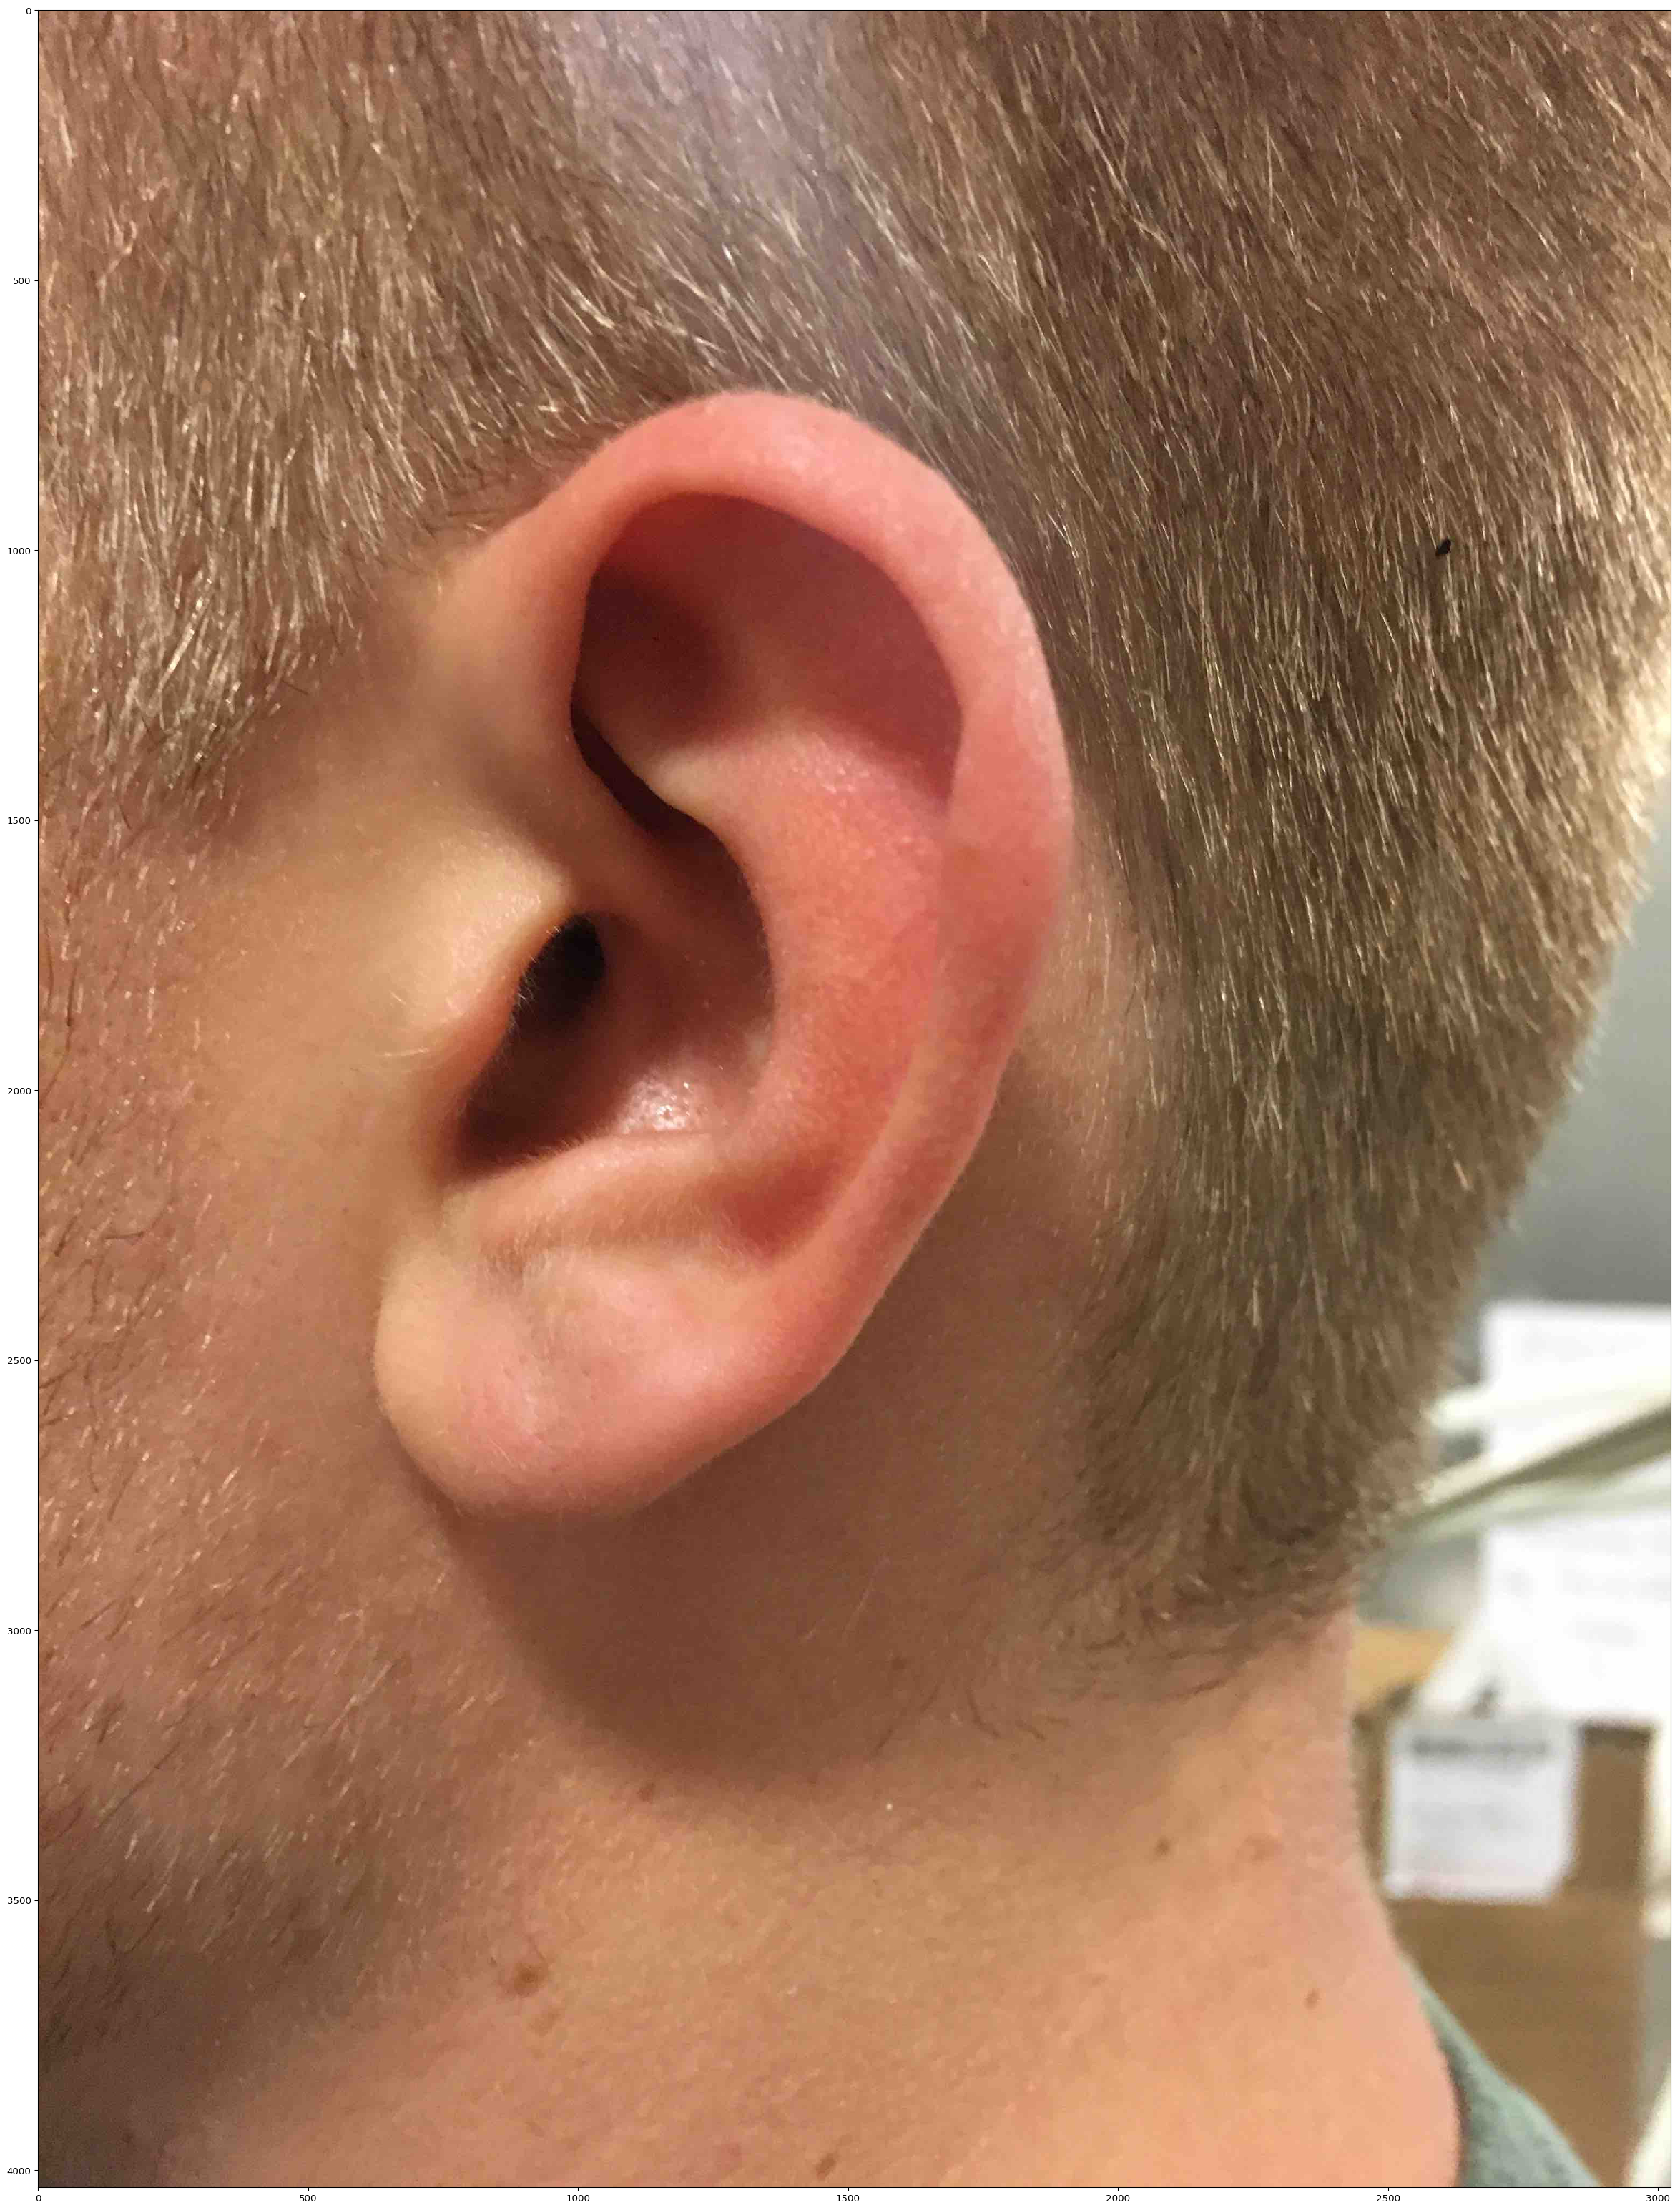

In [51]:
print("Original:")
ia.imshow(image)

Augmented:


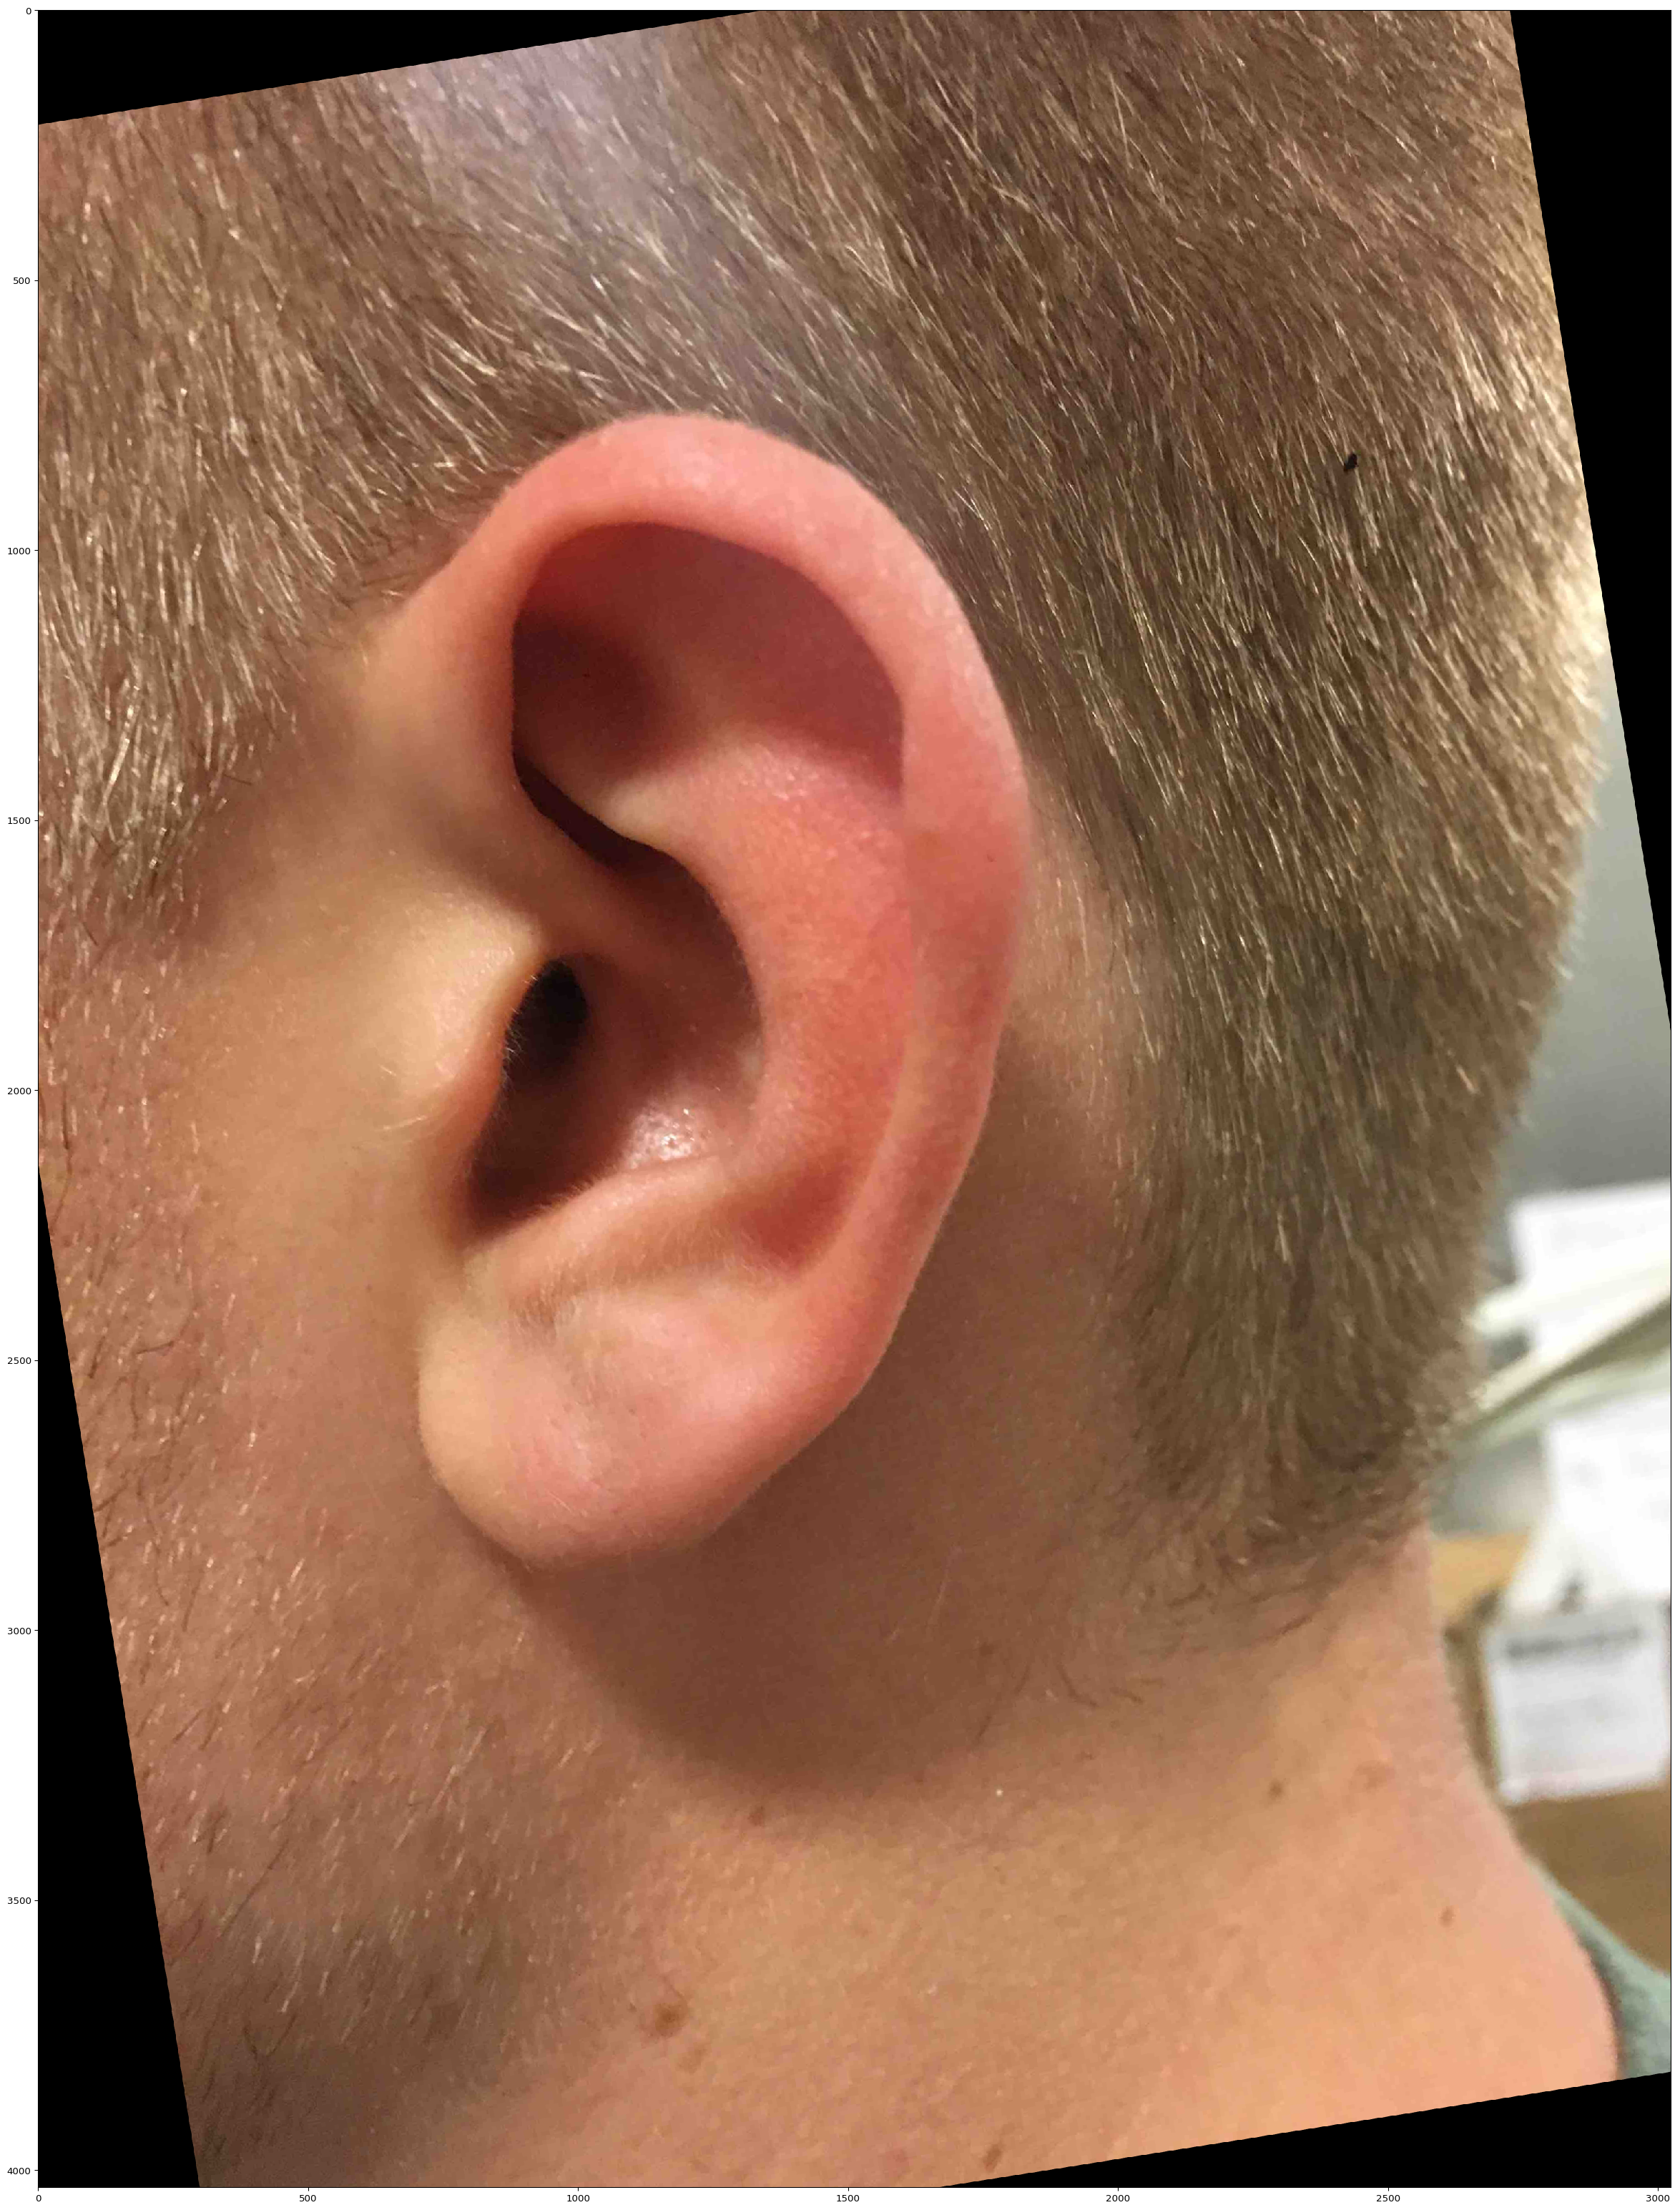

In [52]:
rotate = iaa.Affine(rotate=(-40, 25))
image_aug = rotate.augment_image(image)

print("Augmented:")
ia.imshow(image_aug)

In [61]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)

# Define our sequence of augmentation steps that will be applied to every image
# All augmenters with per_channel=0.5 will sample one value _per image_
# in 50% of all cases. In all other cases they will sample new values
# _per channel_.
seq = iaa.Sequential(
    [
        # apply the following augmenters to most images
        #iaa.Fliplr(0.5), # horizontally flip 50% of all images
        #iaa.Flipud(0.2), # vertically flip 20% of all images
        # crop images by -5% to 10% of their height/width
        sometimes(iaa.CropAndPad(
            percent=(-0.05, 0.1),
            pad_mode=ia.ALL,
            pad_cval=(0, 255)
        )),
        sometimes(iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, # translate by -20 to +20 percent (per axis)
            rotate=(-45, 45), # rotate by -45 to +45 degrees
            shear=(-16, 16), # shear by -16 to +16 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )),
        # execute 0 to 5 of the following (less important) augmenters per image
        # don't execute all of them, as that would often be way too strong
        iaa.SomeOf((0, 5),
            [
                sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
                iaa.OneOf([
                    iaa.GaussianBlur((0, 3.0)), # blur images with a sigma between 0 and 3.0
                    iaa.AverageBlur(k=(2, 7)), # blur image using local means with kernel sizes between 2 and 7
                    iaa.MedianBlur(k=(3, 11)), # blur image using local medians with kernel sizes between 2 and 7
                ]),
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
                # search either for all edges or for directed edges,
                # blend the result with the original image using a blobby mask
                iaa.SimplexNoiseAlpha(iaa.OneOf([
                    iaa.EdgeDetect(alpha=(0.5, 1.0)),
                    iaa.DirectedEdgeDetect(alpha=(0.5, 1.0), direction=(0.0, 1.0)),
                ])),
                iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
                iaa.OneOf([
                    iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
                    iaa.CoarseDropout((0.03, 0.15), size_percent=(0.6, 0.3), per_channel=0.2),
                ]),
                iaa.Invert(0.05, per_channel=True), # invert color channels
                iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                iaa.AddToHueAndSaturation((-20, 20)), # change hue and saturation
                # either change the brightness of the whole image (sometimes
                # per channel) or change the brightness of subareas
                iaa.OneOf([
                    iaa.Multiply((0.5, 1.5), per_channel=0.5),
                    iaa.FrequencyNoiseAlpha(
                        exponent=(-4, 0),
                        first=iaa.Multiply((0.5, 1.5), per_channel=True),
                        second=iaa.ContrastNormalization((0.5, 2.0))
                    )
                ]),
                iaa.ContrastNormalization((0.5, 2.0), per_channel=0.5), # improve or worsen the contrast
                iaa.Grayscale(alpha=(0.0, 1.0)),
#                 sometimes(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # move pixels locally around (with random strengths)
#                 sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))), # sometimes move parts of the image around
#                 sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
            ],
            random_order=True
        )
    ],
    random_order=True
)


In [56]:
files = os.listdir("earImageDataset/")
print(files)
for file in files:
    if( not file.endswith('.jpg')):
        continue;
    image = cv.imread("earImageDataset/"+ file)
    if image is None:
        raise IOError('Unable to read ' + file)
    image = cv.resize(image,(367,504))
    images = [image, image]
    images_aug = seq.augment_images(images)
    for i in range(len(images_aug)):
        cv.imwrite("Augged/"+file.split('.')[0]+'_'+str(i%2) + ".jpg", images_aug[i])
    

['121_t.jpg', '164_t.jpg', '075_.jpg', '130_.jpg', '066_d.jpg', '023_d.jpg', '060_dt.jpg', '160_dt.jpg', '003_dt.jpg', '188_.jpg', '022_.jpg', '103_dt.jpg', '186_d.jpg', '084_t.jpg', '167_.jpg', '079_t.jpg', '034_.jpg', '044_t.jpg', '001_t.jpg', '171_.jpg', '103_d.jpg', '146_d.jpg', '172_dt.jpg', '072_dt.jpg', '063_.jpg', '111_dt.jpg', '011_dt.jpg', '126_.jpg', '159_t.jpg', '139_dt.jpg', '039_dt.jpg', '018_.jpg', '127_d.jpg', '144_dt.jpg', '162_d.jpg', '044_dt.jpg', '060_t.jpg', '025_t.jpg', '127_dt.jpg', '138_t.jpg', '027_dt.jpg', '180_t.jpg', '082_d.jpg', '059_.jpg', '056_dt.jpg', '156_dt.jpg', '042_d.jpg', '007_d.jpg', '105_t.jpg', '140_t.jpg', '035_dt.jpg', '018_t.jpg', '135_dt.jpg', '048_dt.jpg', '148_dt.jpg', '107_t.jpg', '142_t.jpg', '040_d.jpg', '005_d.jpg', '079_.jpg', '096_.jpg', '081_dt.jpg', '181_dt.jpg', '184_.jpg', '118_d.jpg', '062_t.jpg', '027_t.jpg', '125_d.jpg', '160_d.jpg', '192_.jpg', '038_.jpg', '080_d.jpg', '193_dt.jpg', '093_dt.jpg', '182_t.jpg', '080_.jpg', '038

In [62]:
image = cv.imread("earImageDataset/"+ file)
if image is None:
    raise IOError('Unable to read ' + file)
image = cv.resize(image,(367,504))
images = [image, image]
images_aug = seq.augment_images(images)

cv.imwrite("Augged/"+file.split('.')[0]+'_'+str(i%2) + ".jpg", images_aug[1])

True